In [9]:
#Carga de archivos
import pandas as pd
dato = pd.read_csv('vgchartz-2024.csv')
df = pd.DataFrame(dato)
print(df.head())

                                             img                        title  \
0  /games/boxart/full_6510540AmericaFrontccc.jpg           Grand Theft Auto V   
1  /games/boxart/full_5563178AmericaFrontccc.jpg           Grand Theft Auto V   
2                    /games/boxart/827563ccc.jpg  Grand Theft Auto: Vice City   
3  /games/boxart/full_9218923AmericaFrontccc.jpg           Grand Theft Auto V   
4  /games/boxart/full_4990510AmericaFrontccc.jpg    Call of Duty: Black Ops 3   

  console    genre       publisher       developer  critic_score  total_sales  \
0     PS3   Action  Rockstar Games  Rockstar North           9.4        20.32   
1     PS4   Action  Rockstar Games  Rockstar North           9.7        19.39   
2     PS2   Action  Rockstar Games  Rockstar North           9.6        16.15   
3    X360   Action  Rockstar Games  Rockstar North           NaN        15.86   
4     PS4  Shooter      Activision        Treyarch           8.1        15.09   

   na_sales  jp_sales  pal

In [22]:
df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,action,rockstar games,rockstar north,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaT
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,action,rockstar games,rockstar north,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,action,rockstar games,rockstar north,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaT
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,action,rockstar games,rockstar north,0.0,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaT
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,shooter,activision,treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [10]:
# Verificar filas duplicadas
duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")


Número de filas duplicadas: 0


In [11]:
#Verificación de tipos de datos
print(df.dtypes)
print(df.info())

img              object
title            object
console          object
genre            object
publisher        object
developer        object
critic_score    float64
total_sales     float64
na_sales        float64
jp_sales        float64
pal_sales       float64
other_sales     float64
release_date     object
last_update      object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 

In [12]:
#Ajuste de tipos de datos
df['release_date'] = df['release_date'].astype('datetime64[ns]')
df['last_update'] = df['last_update'].astype('datetime64[ns]')
print(df.dtypes)

img                     object
title                   object
console                 object
genre                   object
publisher               object
developer               object
critic_score           float64
total_sales            float64
na_sales               float64
jp_sales               float64
pal_sales              float64
other_sales            float64
release_date    datetime64[ns]
last_update     datetime64[ns]
dtype: object


In [17]:
# Convertir los valores
df['genre'] = df['genre'].str.lower()
# Verificar las categorías únicas
print(df['genre'].unique())

df['publisher'] = df['publisher'].str.lower()
print(df['publisher'].unique())

df['developer'] = df['developer'].str.lower()
print(df['developer'].unique())


['action' 'shooter' 'action-adventure' 'sports' 'role-playing'
 'simulation' 'racing' 'music' 'misc' 'fighting' 'platform' 'adventure'
 'strategy' 'puzzle' 'mmo' 'sandbox' 'party' 'education' 'board game'
 'visual novel']
['rockstar games' 'activision' 'ea sports' ...
 "mind's eclipse interactive" 'walkabout' 'invertmouse']
['rockstar north' 'treyarch' 'infinity ward' ... 'different tales'
 '4d door games' 'invertmouse']


In [25]:
# Verificar  y rellenar valores faltantes
df['developer'] = df['developer'].fillna(0)
df['critic_score'] = df['critic_score'].fillna(0)
df['total_sales'] = df['total_sales'].fillna(0)
df['na_sales'] = df['na_sales'].fillna(0)
df['jp_sales'] = df['jp_sales'].fillna(0)
df['pal_sales'] = df['pal_sales'].fillna(0)
df['other_sales'] = df['other_sales'].fillna(0)
print(df.isnull().sum())


img                 0
title               0
console             0
genre               0
publisher           0
developer           0
critic_score        0
total_sales         0
na_sales            0
jp_sales            0
pal_sales           0
other_sales         0
release_date     7051
last_update     46137
dtype: int64


In [36]:
# Verificar si hay valores anómalos
anomalos = df[df[['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']] < 0].count()
print(anomalos)

img             0
title           0
console         0
genre           0
publisher       0
developer       0
critic_score    0
total_sales     0
na_sales        0
jp_sales        0
pal_sales       0
other_sales     0
release_date    0
last_update     0
dtype: int64


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

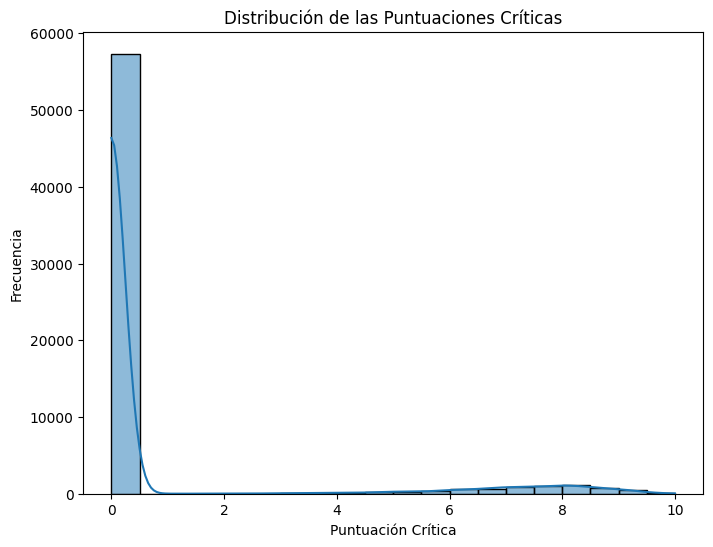

In [42]:
# Histograma para 'critic_score'
plt.figure(figsize=(8, 6))
sns.histplot(df['critic_score'], kde=True, bins=20)
plt.title('Distribución de las Puntuaciones Críticas')
plt.xlabel('Puntuación Crítica')
plt.ylabel('Frecuencia')
plt.show()


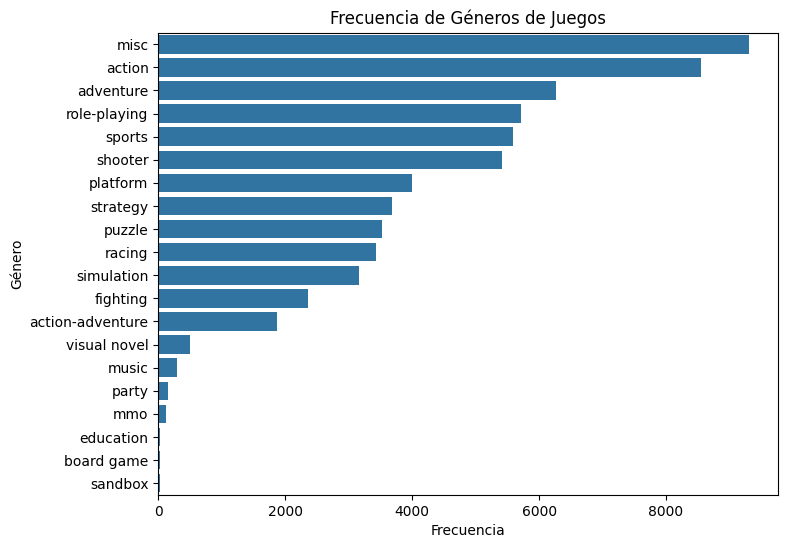

In [43]:
# Gráfico de barras para 'genre'
plt.figure(figsize=(8, 6))
sns.countplot(y='genre', data=df, order=df['genre'].value_counts().index)
plt.title('Frecuencia de Géneros de Juegos')
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.show()


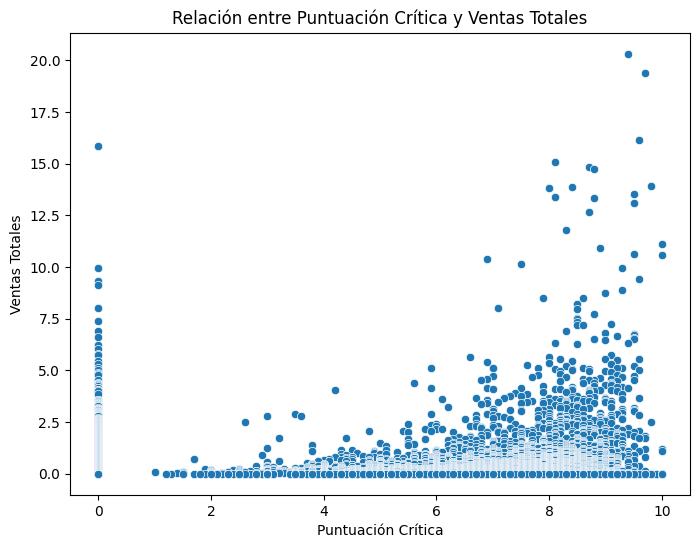

In [44]:
# Gráfico de dispersión entre 'critic_score' y 'total_sales'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=df)
plt.title('Relación entre Puntuación Crítica y Ventas Totales')
plt.xlabel('Puntuación Crítica')
plt.ylabel('Ventas Totales')
plt.show()


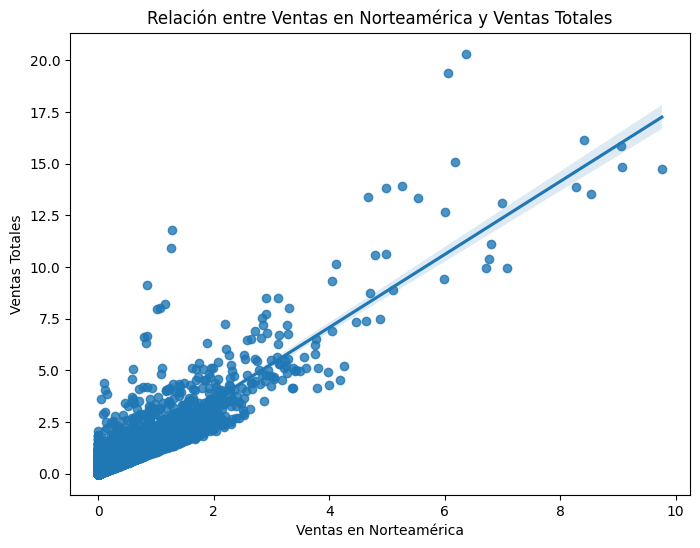

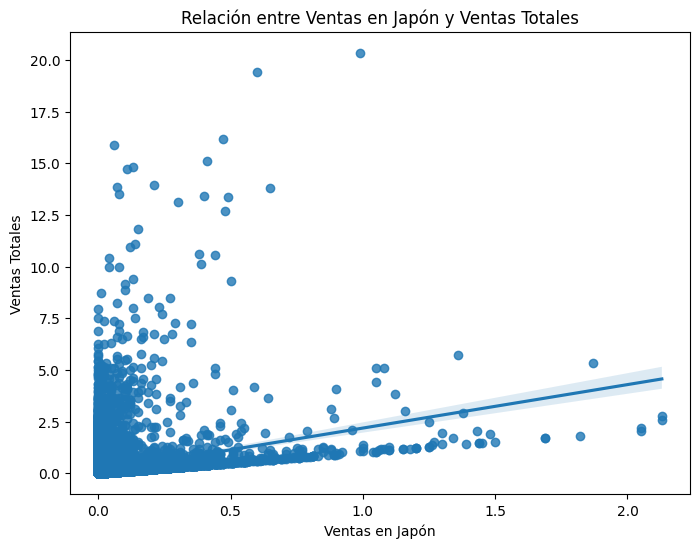

In [48]:
# Gráfico de dispersión entre ventas en Norteamérica y ventas totales
plt.figure(figsize=(8, 6))
sns.regplot(x='na_sales', y='total_sales', data=df)
plt.title('Relación entre Ventas en Norteamérica y Ventas Totales')
plt.xlabel('Ventas en Norteamérica')
plt.ylabel('Ventas Totales')
plt.show()

# Gráfico de dispersión entre ventas en Japón y ventas totales
plt.figure(figsize=(8, 6))
sns.regplot(x='jp_sales', y='total_sales', data=df)
plt.title('Relación entre Ventas en Japón y Ventas Totales')
plt.xlabel('Ventas en Japón')
plt.ylabel('Ventas Totales')
plt.show()


In [49]:
# Resumen estadístico de las variables numéricas
estadisticas_descriptivas = df.describe()
print(estadisticas_descriptivas)


       critic_score   total_sales      na_sales      jp_sales     pal_sales  \
count  64016.000000  64016.000000  64016.000000  64016.000000  64016.000000   
mean       0.753220      0.103192      0.052261      0.010746      0.029943   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.020000      0.000000      0.000000      0.000000   
max       10.000000     20.320000      9.760000      2.130000      9.850000   
std        2.256713      0.466999      0.243780      0.063067      0.185641   

        other_sales                   release_date  \
count  64016.000000                          56965   
mean       0.010171  2006-11-14 06:33:03.491617792   
min        0.000000            1971-12-03 00:00:00   
25%        0.000000            2001-03-28 00:00:00   
50%        0.00000

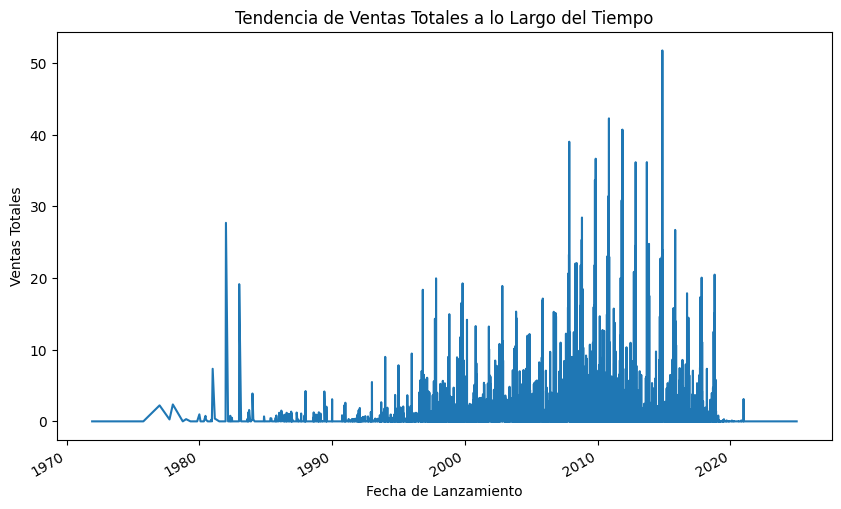

In [50]:
# Convertir release_date a formato datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Gráfico de ventas totales a lo largo del tiempo
plt.figure(figsize=(10, 6))
df.groupby('release_date')['total_sales'].sum().plot()
plt.title('Tendencia de Ventas Totales a lo Largo del Tiempo')
plt.xlabel('Fecha de Lanzamiento')
plt.ylabel('Ventas Totales')
plt.show()


In [53]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlacion = df_numerico.corr()

# Mostrar las correlaciones más fuertes (mayor a 0.5 o menor a -0.5)
correlaciones_fuertes = correlacion[(correlacion > 0.5) | (correlacion < -0.5)]
print(correlaciones_fuertes)



              critic_score  total_sales  na_sales  jp_sales  pal_sales  \
critic_score           1.0          NaN       NaN       NaN        NaN   
total_sales            NaN     1.000000  0.922097       NaN   0.908952   
na_sales               NaN     0.922097  1.000000       NaN   0.719019   
jp_sales               NaN          NaN       NaN       1.0        NaN   
pal_sales              NaN     0.908952  0.719019       NaN   1.000000   
other_sales            NaN     0.866086  0.716735       NaN   0.832800   

              other_sales  
critic_score          NaN  
total_sales      0.866086  
na_sales         0.716735  
jp_sales              NaN  
pal_sales        0.832800  
other_sales      1.000000  


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Definir la variable dependiente (y) y la independiente (X)
X = df[['critic_score']]  # Variable independiente (predictora)
y = df['total_sales']     # Variable dependiente (predicha)

# Separar en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Error cuadrático medio: {mse}')
print(f'Raíz del error cuadrático medio: {rmse}')


Error cuadrático medio: 0.18216813949313107
Raíz del error cuadrático medio: 0.4268115971867811
